In [1]:
%matplotlib inline
import itertools
import numpy as np
import time
import gpflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from gpflow.ci_utils import ci_niter

plt.style.use("ggplot")

# for reproducibility of this notebook:
rng = np.random.RandomState(123)
tf.random.set_seed(42)

"""
Document source:
https://gpflow.readthedocs.io/en/develop/notebooks/advanced/gps_for_big_data.html

Wait for advanced implementation:
https://gpflow.readthedocs.io/en/develop/notebooks/advanced/advanced_many_points.html
"""

'\nDocument source:\nhttps://gpflow.readthedocs.io/en/develop/notebooks/advanced/gps_for_big_data.html\n\n'

In [2]:
def func(x):
    return np.sin(x * 3 * 3.14) + 0.3 * np.cos(x * 9 * 3.14) + 0.5 * np.sin(x * 7 * 3.14)


N = 10000  # Number of training observations

X = rng.rand(N, 1) * 2 - 1  # X values
Y = func(X) + 0.2 * rng.randn(N, 1)  # Noisy Y values
data = (X, Y)

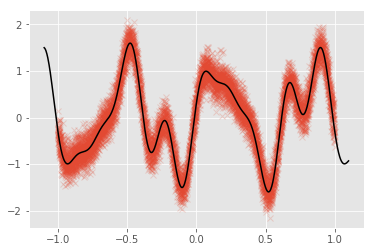

In [3]:

plt.plot(X, Y, "x", alpha=0.2)
Xt = np.linspace(-1.1, 1.1, 1000)[:, None]
Yt = func(Xt)
_ = plt.plot(Xt, Yt, c="k")

In [5]:
M = 50  # Number of inducing locations

kernel = gpflow.kernels.SquaredExponential()
Z = X[:M, :].copy()  # Initialize inducing locations to the first M inputs in the dataset

m = gpflow.models.SVGP(kernel, gpflow.likelihoods.Gaussian(), inducing_variable=Z, num_data=N)

In [ ]:
og_likelihood = tf.function(m.log_likelihood)